In [4]:
#%%shell
#jupyter nbconvert --to html /content/Preethi_GT_PYF_Project_LearnerNotebook_FullCode_Solution.ipynb

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

### Understanding the structure of the data

In [6]:
# colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Project_1_Food_Hub/foodhub_order.csv')


In [8]:
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [9]:
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


**Observations:**

The Data Frame has 9 columns as mentioned in the Data Dictionary. 

Data in each row corresponds to the order placed by a customer.



### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [10]:
# Returns a tuple of the shape of the data
df.shape

(1898, 9)

In [11]:
# Returns the number of rows and Columns present in the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns in the given data.")

There are 1898 rows and 9 columns in the given data.


**Observations:**
The DataFrame has 1898 rows and 9 Columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [12]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**

The data set has 1 float, 4 integers, and 4 object types.

Rating is read as object datatype instead of integer datatype and requires further examination.

The count of non-null values is the same for all columns, and it is also equal to the total row count of the data frame which indicates no missing data.

The memory usage of 133.6+ KB.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [13]:
# Returns the sum of  missing or Null values in a dataset for each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations**:

There are no missing values in dataset and requires no treatment,however the rating column have 'Not given' entries.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
# Returns Statistical summary of the data for Numerical Datatype
df.describe(exclude=[object]).T


,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [15]:
# Returns Statistical summary of the data for object Datatype
df.describe(exclude=[np.number]).T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


**Observations**:

**cost_of_the_order:** On average, the cost of the order is 16.5 USD. The Cost of the order ranges from 4.47 USD to 35.41 USD. 75% of the cost of orders is either 22.3 USD or less than 22.3 USD.

The difference between the highest cost of the order and the 75th percentile indicates outliers in the data.

**food_preparation_time**: On average, it takes about 27.37 minutes to prepare food and 50% of the food is prepared on or before 27 minutes. The Mean and Median are very close and imply uniform distribution without any peaks.

The least time taken to prepare food is 20 minutes and the maximum time taken to prepare is 35 minutes.

**delivery_time:** On average, it takes about 24.16 minutes to deliver the food, and 50% of the food is delivered on or before 25 minutes. 

The least time taken to deliver food is 15 minutes and the maximum time taken is 33 minutes. 

**restaurant_name:**
There are a total of 178 restaurants in the dataset and the most popular restaurant is Shake Shack with 219 orders.

**cuisine_type:**
There are 14 different types of cuisines ordered and most favorite cuisine type is American.

**day_of_the_week:**
Most orders are made on weekends compared to weekday.

**rating:**
Most orders are not rated.

### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
# Returns the unique Ratings
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [17]:
# Returns the number of orders that are not rated.
orders_not_rated_count=df['rating'].value_counts()['Not given']

In [18]:
# Prints the total number of orders not rated
print('Total number of orders that are not rated :',orders_not_rated_count)

Total number of orders that are not rated : 736


In [19]:
# Returns percentage of Contribution of orders not rated to over all Values.
print('Percentage of ratings not given :', round((df['rating'].value_counts(normalize=True)['Not given'])*100,2),'%',sep='')

Percentage of ratings not given :38.78%


In [20]:
#Creates a new dataset excluding the data which are not rated.
df_rated_data= df[df['rating'] != 'Not given'].copy()
# Convert rating column from object to integer in the new Data Frame.
df_rated_data['rating'] = df_rated_data['rating'].astype('int')  

**Observations:**

out of 1898 orders 736 orders are not rated.

Not rated orders contributes to 
38.7% 

In [21]:
# Returns duplicate entries in dataset
df.duplicated().sum()

0

**Observations:**

There are no duplicate entries in the dataset

In [22]:
# Returns the count of unique values for all the columns in dataset.
column_list=list(df.columns)
df[column_list].nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

**Observations**:

1898 orders are placed by 1200 customers for 14 different cuisines that are served across 178 restaurants.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

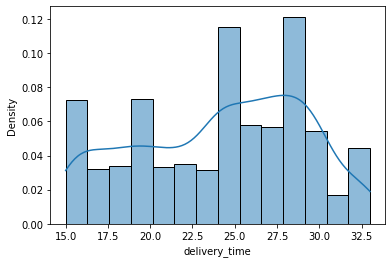

In [23]:
df['delivery_time']
sns.histplot(df['delivery_time'], kde = True, stat = 'density')

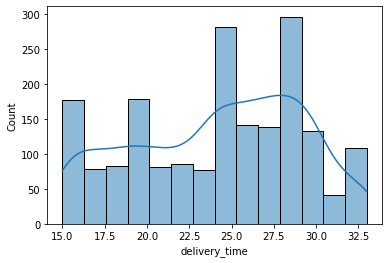

In [24]:
df['delivery_time']
sns.histplot(df['delivery_time'], kde = True,stat=)

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Customer ID**

In [ ]:
#Returns the unique values of count of unique occurrences for individual customer ID
df['customer_id'].value_counts().unique()

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
# Returns the unique count of unique occurrences count for individual customer ID
df_order_count=pd.DataFrame(df['customer_id'].value_counts().value_counts().sort_index().reset_index())
# Adding Columns names to the dataframe
df_order_count.columns=['Order Count','Customer Count']

In [ ]:
#Returns order count and Customer count
df_order_count

,Order Count,Customer Count
0,1,784
1,2,267
2,3,83
3,4,33
4,5,19
5,6,6
6,7,4
7,8,1
8,9,1
9,10,1


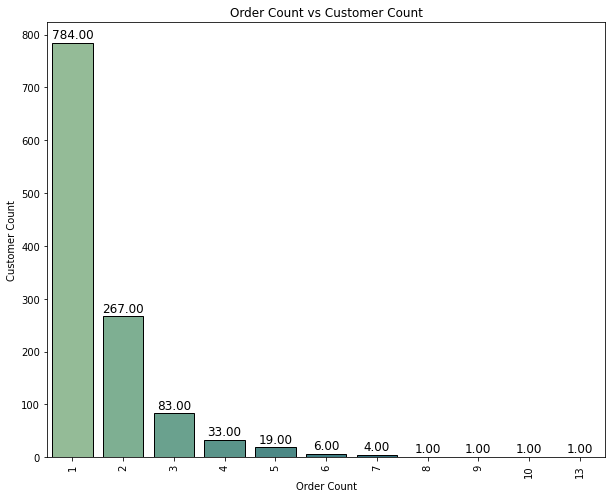

In [ ]:
plt.figure(figsize=(10,8))
bplot=sns.barplot(data=df_order_count, x='Order Count', y='Customer Count',palette='crest',edgecolor='black')
bplot.set_title('Order Count vs Customer Count')
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90);

In [ ]:
# Returns top 4 customer ID with highest number of orders placed
df_highest_order_count_cust= df['customer_id'].value_counts().nlargest(4)
df_highest_order_count_cust

52832     13
47440     10
83287      9
250494     8
Name: customer_id, dtype: int64

**Observations:**

Range for Customer's Order Count is 1 -13.

Out of 1200 customers, 784 customers purchased only one time.

Customer ID 528832 is most frequent customer with 13 orders placed.

**Cost of the Order**

In [ ]:
df[(df['cost_of_the_order']>= 10) & (df['cost_of_the_order']<15)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time_taken
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83,51
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74,49
13,1477449,104548,Pylos,Mediterranean,11.30,Weekend,3,24,23,1.70,47
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30,1.82,53
...,...,...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,2.10,62
1881,1476700,127036,Shake Shack,American,12.23,Weekend,Not given,27,18,1.83,45
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25,2.17,59
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.83,50


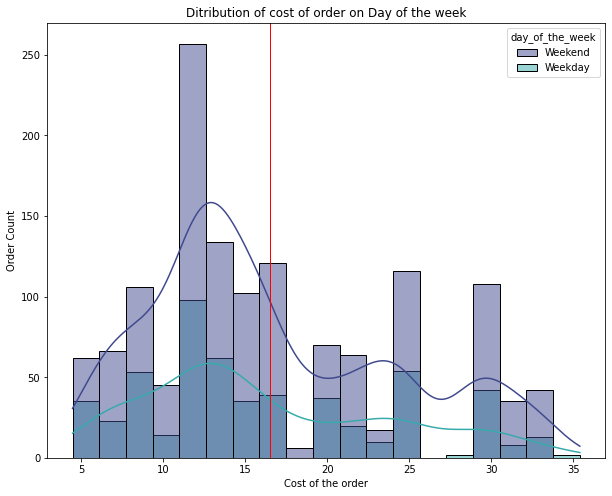

In [ ]:
plt.figure(figsize=(10,8));
sns.histplot(data=df, x='cost_of_the_order',hue='day_of_the_week',kde=True,palette='mako');
plt.axvline(df['cost_of_the_order'].mean(), color='r', linewidth=1)
plt.title('Ditribution of cost of order on Day of the week')
plt.xlabel('Cost of the order') 
plt.ylabel('Order Count') 
plt.show()

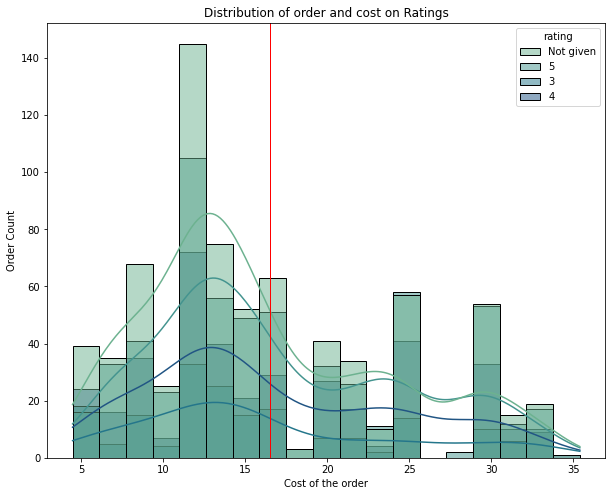

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'rating', kde = True,palette='crest')
plt.axvline(df['cost_of_the_order'].mean(), color='r', linewidth=1)
plt.title('Distribution of order and cost on Ratings')
plt.xlabel('Cost of the order') 
plt.ylabel('Order Count') 
plt.show()

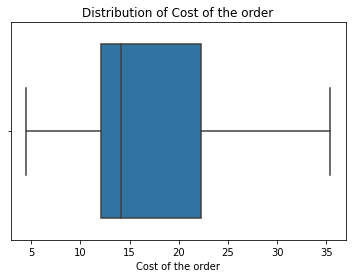

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order')
plt.title('Distribution of Cost of the order')
plt.xlabel('Cost of the order') 
plt.show()

**Observations:**

The cost of the order has no outliers, and the distribution is right skewed. 

The cost of the order is higher on weekends than on weekdays.

Most of the orders placed and rated fall under the price range of 10-15 USD.

The multi modes on the histplot indicates audiences of different income group.


**Food Preparation Time**

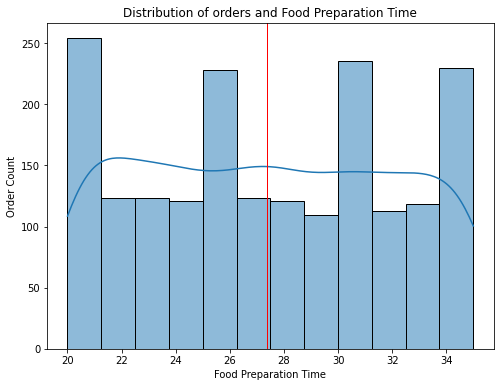

In [ ]:
plt.figure(figsize=(8,6));
sns.histplot(data=df, x='food_preparation_time',kde=True);
plt.axvline(df['food_preparation_time'].mean(), color='r', linewidth=1)
plt.title('Distribution of orders and Food Preparation Time')
plt.xlabel('Food Preparation Time') 
plt.ylabel('Order Count') 
plt.show()

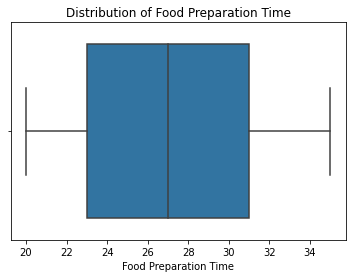

In [ ]:
sns.boxplot(data=df,x='food_preparation_time')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time') 
plt.show()

#### Observations:

Food preparation time has no outliers.

The mean and median are equal and the values of the distribution are evenly spaced.


**Delivery Time**

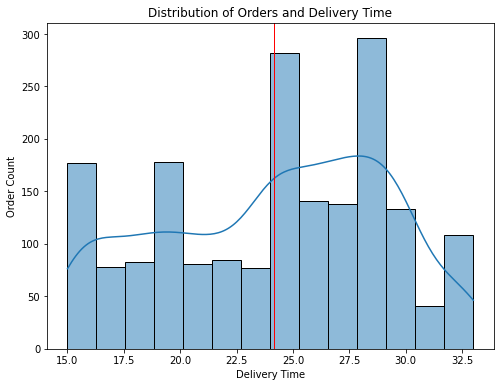

In [ ]:
plt.figure(figsize=(8,6));
sns.histplot(data=df, x='delivery_time',kde=True);
plt.axvline(df['delivery_time'].mean(), color='r', linewidth=1)
plt.title('Distribution of Orders and Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Order Count')
plt.show()

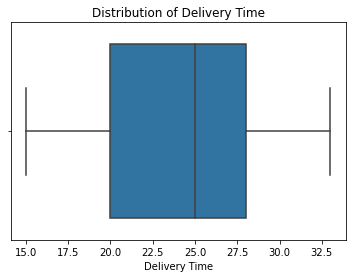

In [ ]:
sns.boxplot(data=df,x='delivery_time')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()

#### Observations:
Delivery time has no outliers.

The distribution is slightly left skewed.

The peak on the histplot indicates most of the orders are delivered around 25 minutes to 28 minutes.


**Rating**

In [ ]:
#Returns the unique count of each rating value
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
#Returns the relative frequency percentage between each rating value
df['rating'].value_counts(normalize=True)*100

Not given   38.78
5           30.98
4           20.34
3            9.91
Name: rating, dtype: float64

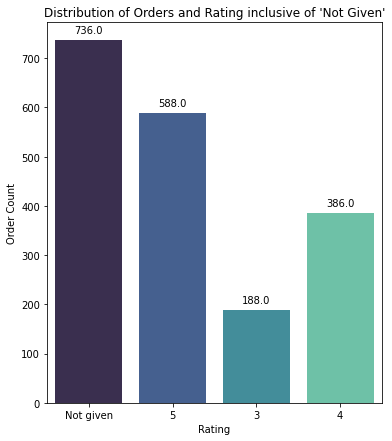

In [ ]:
plt.figure(figsize=(6, 7))
splot = sns.countplot(data=df, x ='rating',palette='mako')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Distribution of Orders and Rating inclusive of 'Not Given'")
plt.xlabel('Rating')
plt.ylabel('Order Count')
plt.show()

**Observations:**

Ratings categories and order counts are as follows

Not Given- 736 Orders

5.0 - 588 orders

4.0 - 386 orders

3.0 - 188 orders


In [ ]:
# Excluding the 'Not Given' values and calculating the relative frequency between ratings
df_rated_data['rating'].value_counts(normalize=True)*100

5   50.60
4   33.22
3   16.18
Name: rating, dtype: float64

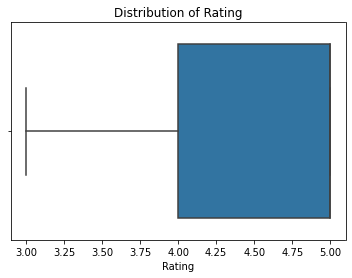

In [ ]:
sns.boxplot(data = df_rated_data, x='rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.show()

**Observations:**

38% of the Orders are not Rated.

Box plot indicates most of the orders are highly rated and it has no outliers.

From the orders that are rated, 83% of the orders are between 4 and 5.

**Day of the week**

In [ ]:
#Returns the unique count of orders for weekdays and weekends
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
#Returns the relative frequency percentage of orders for weekdays and weekends
df['day_of_the_week'].value_counts(normalize=True)*100

Weekend   71.18
Weekday   28.82
Name: day_of_the_week, dtype: float64

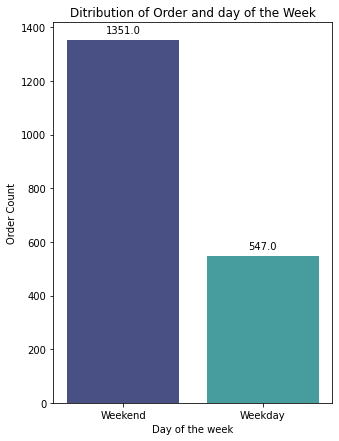

In [ ]:
plt.figure(figsize=(5,7))
splot = sns.countplot(data=df, x = 'day_of_the_week',palette='mako')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Ditribution of Order and day of the Week')
plt.xlabel('Day of the week')
plt.ylabel('Order Count')
plt.show()

**Observations:**

Orders on Weekends are higher when compared to Weekdays.

547 orders were placed on weekday and 1351 orders were placed on weekends.

71% of the total orders are on Weekends and the rest 29% are on Weekdays.

**Restaurant Name**

In [ ]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

**Observations:**

There are few restaurant names that contain additional characters  and needs to fixed with corrected names

Below is the list of names to be corrected along with their names to be replaced

* Big Wong Restaurant \x8c_¤¾Ñ¼ - Big Wong Restaurant
* Empanada Mama (closed) - Empanada Mama
* Chipotle Mexican Grill $1.99 Delivery - Chipotle Mexican Grill
* Joe's Shanghai \x8e_À\x8eü£¾÷´ - Joe's Shanghai
* Dirty Bird To Go (archived)-Dirty Bird To Go
* CafÌ© China - Cafe China

In [ ]:
# Created two list one for existing restaurant names and other for corrected restaurant names
old_rest_names = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']
new_rest_names = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joe's Shanghai", 'Dirty Bird To Go', 'Cafe China']


In [ ]:
#Replace the old restaurant name with new restaurant names for  mistyped restaurants 
df['restaurant_name'] = df['restaurant_name'].replace(old_rest_names,new_rest_names)

In [ ]:
#Displays corrected restaurant names
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama', 'Pylos', "Lucky's Famous Burgers", 'Shake Shack',
       'Sushi of Gari', 'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'RedFarm Broadway',
       'Cafeteria', 'DuMont Burger', "Sarabeth's East",
       'Hill Country Fried Chicken', 'Bistango', "Jack's Wife Freda",
       "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morin

In [ ]:
#Returns the unique values of count of unique occurrences for individual Restaurant
df['restaurant_name'].value_counts().unique()

array([219, 132, 119,  96,  68,  59,  55,  49,  46,  44,  42,  37,  30,
        29,  27,  25,  24,  23,  18,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1])

In [ ]:
# Returns the unique count of unique occurrences count for individual Restaurant
df_order_rest_count=pd.DataFrame(df['restaurant_name'].value_counts().value_counts().sort_index().reset_index())
# Adding Columns names to the dataframe
df_order_rest_count.columns=['Order Count','Restaurant Count']

In [ ]:
df_order_rest_count.sort_values(by='Order Count',ascending=False)

,Order Count,Restaurant Count
34,219,1
33,132,1
32,119,1
31,96,1
30,68,1
29,59,1
28,55,1
27,49,1
26,46,1
25,44,1


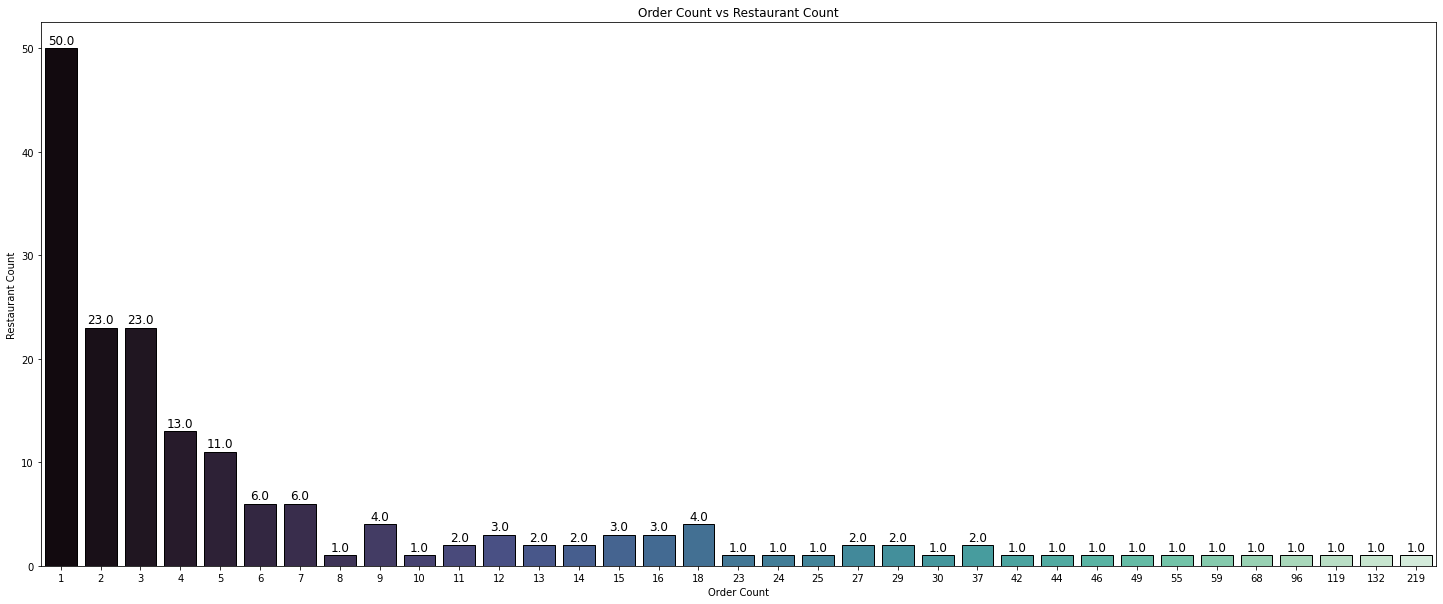

In [ ]:
plt.figure(figsize=(25,10))
bplot=sns.barplot(data=df_order_rest_count, x='Order Count', y='Restaurant Count',palette='mako',edgecolor='black')
bplot.set_title('Order Count vs Restaurant Count')
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [ ]:
#Extracts top 10 restaurant name
top10_rest_name = df['restaurant_name'].value_counts().reset_index().iloc[0:10,0]
top10_rest_name
# Creates a seperate dataframe of top 10 restaurants
df_top10_rest_name = df[df['restaurant_name'].isin(top10_rest_name)]

In [ ]:
#Returns relative frequency percentage between each restaurant order count
df['restaurant_name'].value_counts(normalize=True)*100

Shake Shack                 11.54
The Meatball Shop            6.95
Blue Ribbon Sushi            6.27
Blue Ribbon Fried Chicken    5.06
Parm                         3.58
                             ... 
Sushi Choshi                 0.05
Dos Caminos Soho             0.05
La Follia                    0.05
Philippe Chow                0.05
'wichcraft                   0.05
Name: restaurant_name, Length: 178, dtype: float64

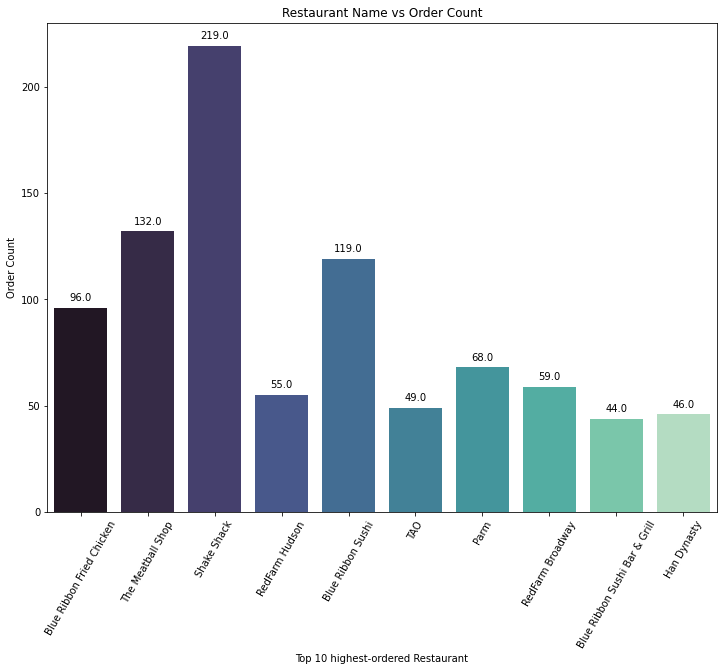

In [ ]:
plt.subplots(figsize = (12,9))
splot=sns.countplot(data = df_top10_rest_name, x = 'restaurant_name',palette='mako')
splot.set_title('Restaurant Name vs Order Count')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=60)
plt.xlabel('Top 10 highest-ordered Restaurant')
plt.ylabel('Order Count')
plt.show()

**Observations:**

Top 5 restaurants receiving orders are Shake Shack with 219,The Meatball Shop with 132,Blue Ribbon Sushi with 119,Blue Ribbon Fried Chicken with 96 and Parm with 68.

Shake Shack receives 11% of the total orders.

50 Restaurants received only one order and around 77% of the Restaurants receive less than 10 orders.


**Cuisine Type**

In [ ]:
#Returns the unique count of each cuisine type
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [ ]:
#Returns the relative frequency percentage between cuisine types fo which orders are placed
df['cuisine_type'].value_counts(normalize=True)*100

American         30.77
Japanese         24.76
Italian          15.70
Chinese          11.33
Mexican           4.06
Indian            3.85
Middle Eastern    2.58
Mediterranean     2.42
Thai              1.00
French            0.95
Southern          0.90
Korean            0.68
Spanish           0.63
Vietnamese        0.37
Name: cuisine_type, dtype: float64

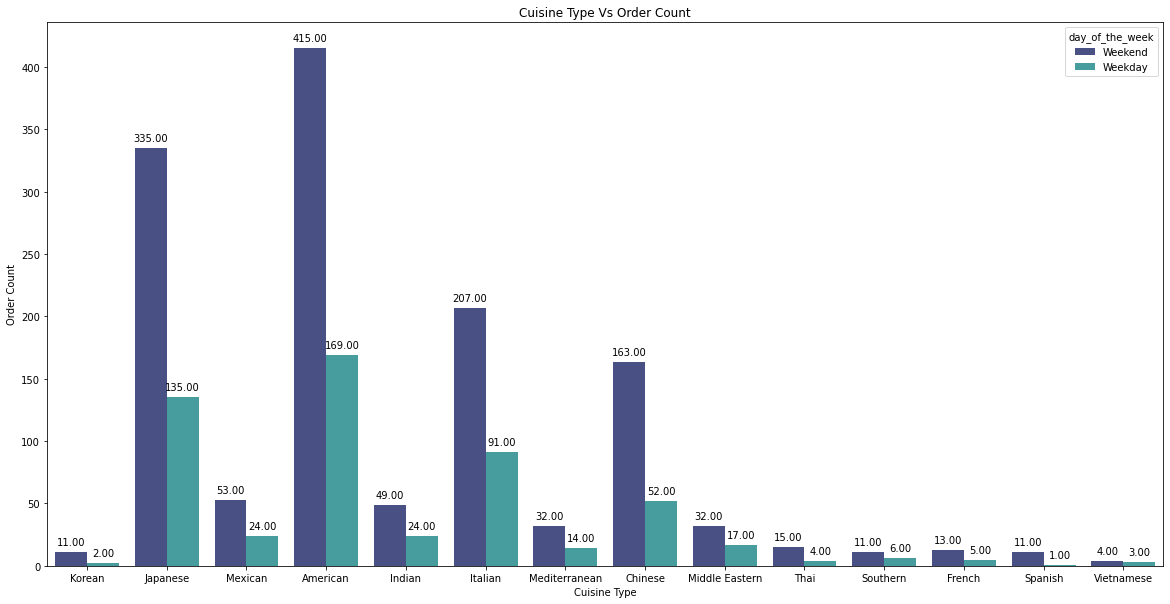

In [ ]:
plt.figure(figsize=(20, 10))
splot = sns.countplot(data=df, x ='cuisine_type',hue='day_of_the_week',palette='mako')
splot.set_title('Cuisine Type Vs Order Count')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.show()

**Observations:**

Most ordered cuisine types is  American over the weekdays and weekends.

30% food preferred are American cuisine, 24% are Japanese, 15% are Italian,11% are Chinese and remaining 20% are other types of cuisines.

Orders placed for Mexican and Indian Food types are very close.

Least preferred cuisine types are Vietnamese, Spanish, Korean, Southern and French.

Spanish and Korean Cuisine type shows a significant difference in their order on Weekends than Weekdays. It has around 80% increase in their orders.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Returns the total number of orders for each resturant with most ordered at the top
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Observation:**

The top 5 Resutaurants with highest order are Shake Shack with 219 orders,The Meatball Shop with 132,Blue Ribbon Sushi with 119,Blue Ribbon Fried Chicken with 96 and Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df_weekend=df.groupby(['day_of_the_week'])['cuisine_type'].get_group('Weekend').value_counts(ascending=False).nlargest(1)
print('The Most popular cuisine on weekends is  : ', df_weekend)

The Most popular cuisine on weekends is  :  American    415
Name: cuisine_type, dtype: int64


**Observation:**

Most popular cuisine on weekend is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
print('The percentage of orders that cost more than 20 dollars : ',round((df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100,2),'%')

The percentage of orders that cost more than 20 dollars :  29.24 %


In [ ]:
print('There are ',((df['cost_of_the_order']>20).sum()),'orders that cost more than 20 dollars')

There are  555 orders that cost more than 20 dollars


**Observation:**

The percentage of orders that cost more than 20 dollars :  29.24 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
print('The Average delivery time :',round(df['delivery_time'].mean(),2))

The Average delivery time : 24.16


**Observation:**

The average time taken for Delivery is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

**Observation:**

Customer IDs 52832,47440 and 83287 are the top 3 Customers who placed 13,10 and 9 order respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Multivariate Analysis on Numerical Columns**

**Cost of the order vs Food preparation time vs Delivery time**

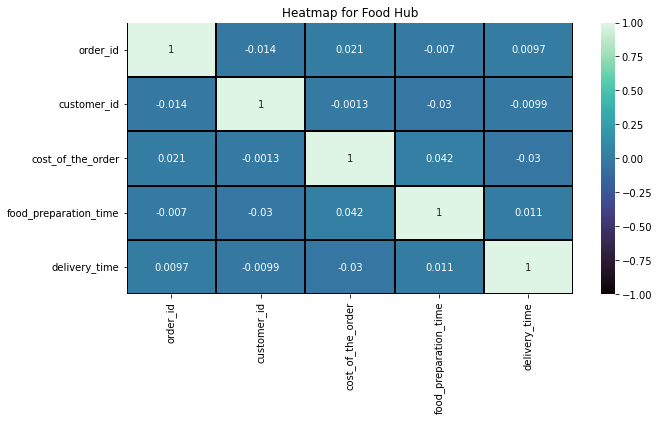

In [ ]:
plt.figure(figsize=(10,5))
hmap=sns.heatmap(df.corr(),annot=True,cmap='mako',vmin=-1,vmax=1,linecolor='black',linewidths=1);
hmap.set_title('Heatmap for Food Hub')
plt.show()

<Figure size 1080x720 with 0 Axes>

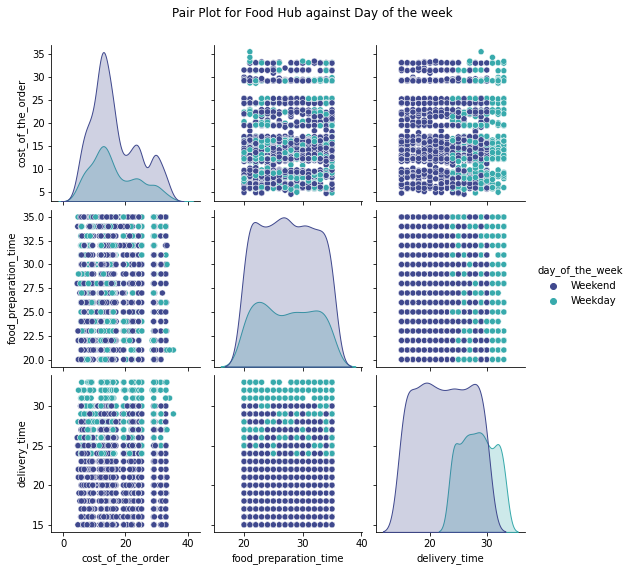

In [ ]:
plt.figure(figsize=((15,10)))
pplot=sns.pairplot(data =df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'],hue='day_of_the_week', diag_kind="kde",palette='mako')
pplot.fig.suptitle('Pair Plot for Food Hub against Day of the week',y=1.05)
plt.show()

**Observations:**

All observed values on Heat Map and Pairplot indicate no proper correlation between the three variables.

The Food Preparation time and the cost of the order on Weekdays and Weekends are almost the same except for Delivery time which is higher on Weekdays compared to Weekends.


<Figure size 1800x1800 with 0 Axes>

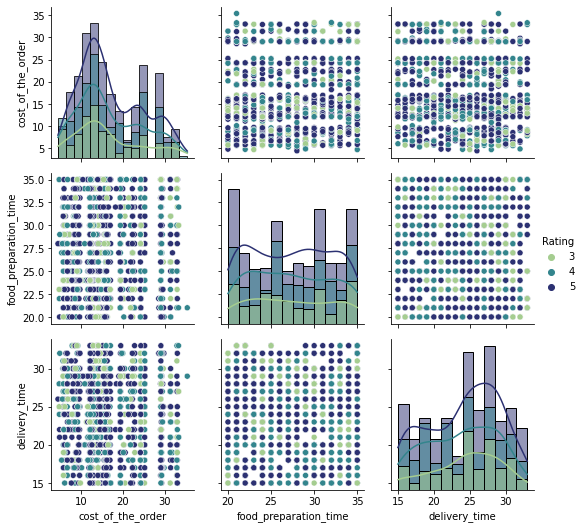

In [ ]:
plt.figure(figsize=(25,25))
pgrid=sns.PairGrid(data =df_rated_data, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'],hue='rating',palette='crest')
pgrid.map_diag(sns.histplot, kde=True)
pgrid.map_offdiag(sns.scatterplot)
pgrid.add_legend(title="Rating", adjust_subtitles=True)
plt.show()

**Observations:**

There is no linear relationship between the variables .

Most of the ratings are rated for the price range of 10-15 USD.

The number of Ratings begin to increase around the average delivery time and it remains constant for all food preparation times.

**Cuisine Type Vs Restaurant Name**

In [ ]:
# Returns number of cuisine types served in each restaurant
df_rest_cuisine_cnt=df.groupby(['restaurant_name'])['cuisine_type'].nunique().sort_values(ascending=False).reset_index()
df_rest_cuisine_cnt.columns=['Restaurant Name','Cuisine Count']
df_rest_cuisine_cnt

,Restaurant Name,Cuisine Count
0,The Meatball Shop,2
1,'wichcraft,1
2,Pepe Rosso To Go,1
3,Piccolo Angolo,1
4,Pinto Nouveau Thai Bistro,1
...,...,...
173,Galli Restaurant,1
174,Go! Go! Curry!,1
175,Grand Sichuan International,1
176,Haandi,1


**Observation:**

The Meatball Shop is the only restaurant in which orders are placed for two different cuisines.

In [ ]:
#Returns Order Count for each cuisine_type
df_cus_order_cnt= df.groupby(['cuisine_type'])['order_id'].nunique().sort_values(ascending=False).reset_index()
df_cus_order_cnt.columns=['Cuisine Name','Order Count']
df_cus_order_cnt

,Cuisine Name,Order Count
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77
5,Indian,73
6,Middle Eastern,49
7,Mediterranean,46
8,Thai,19
9,French,18


In [ ]:
#Returns Restaurant count for each cuisine type
df_cus_rest_cnt=df.groupby(['cuisine_type'])['restaurant_name'].nunique().sort_values(ascending=False).reset_index()
df_cus_rest_cnt.columns=['Cuisine Name','Restaurant Count']
df_cus_rest_cnt

,Cuisine Name,Restaurant Count
0,American,41
1,Italian,31
2,Japanese,29
3,Chinese,16
4,Indian,14
5,Mexican,11
6,Thai,9
7,Middle Eastern,7
8,Korean,5
9,Mediterranean,5


In [ ]:
#Returns Average rating for each cuisine type
df_cus_rating_mean=df_rated_data.groupby(['cuisine_type'])['rating'].mean().reset_index()
df_cus_rating_mean.columns=['Cuisine Name','Average Rating']
df_cus_rating_mean

,Cuisine Name,Average Rating
0,American,4.30
1,Chinese,4.34
2,French,4.30
3,Indian,4.54
4,Italian,4.36
5,Japanese,4.37
6,Korean,4.11
7,Mediterranean,4.22
8,Mexican,4.42
9,Middle Eastern,4.24


In [ ]:
#Merge Restaurant Count, Order Count and Average Rating Dataframes for all Cuisine Types
df_cus_rest_order_cnt_rating = pd.merge(pd.merge(df_cus_rest_cnt,df_cus_order_cnt,on='Cuisine Name'),df_cus_rating_mean,on='Cuisine Name')
#Sort the Merged Dataset based on Average Rating followed by Order Count
df_cus_rest_order_cnt_rating_sorted=df_cus_rest_order_cnt_rating.sort_values(by=['Average Rating','Order Count'],ascending=False)
df_cus_rest_order_cnt_rating_sorted=df_cus_rest_order_cnt_rating_sorted.reset_index(drop=True)
df_cus_rest_order_cnt_rating_sorted

,Cuisine Name,Restaurant Count,Order Count,Average Rating
0,Spanish,3,12,4.83
1,Thai,9,19,4.67
2,Indian,14,73,4.54
3,Mexican,11,77,4.42
4,Japanese,29,470,4.37
5,Italian,31,298,4.36
6,Chinese,16,215,4.34
7,Southern,2,17,4.31
8,French,3,18,4.30
9,American,41,584,4.30


**Observation:**

Orders are placed for 14 cuisine types. The American and Japanese alone contribute 54% and the remaining 46% are shared by 12 other cuisine types.

American cuisine is the most preferred and has an average rating of 4.3. Japanese and Italian are the next popular cuisine type but have an average rating higher than American.

Indian and Mexican are the cuisine type that has an average rating higher than American and with a reasonable  count of orders placed other than  the top 5 cuisines.


**Top 10 Restaurants**

In [ ]:
#Extracts top 10 restaurant name
top10_rest_name = df['restaurant_name'].value_counts().reset_index().iloc[0:10,0]
top10_rest_name
# Creates a seperate dataframe of top 10 restaurants
df_top10_rest_name = df[df['restaurant_name'].isin(top10_rest_name)]

In [ ]:
#Returns Order Count for  Top 10 Restaurant
df_rest_order_cnt= df_top10_rest_name.groupby(['restaurant_name'])['order_id'].nunique().sort_values(ascending=False).reset_index()
df_rest_order_cnt.columns=['Restaurant Name','Order Count']
df_rest_order_cnt

,Restaurant Name,Order Count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55
7,TAO,49
8,Han Dynasty,46
9,Blue Ribbon Sushi Bar & Grill,44


In [ ]:
#Returns Cuisine count for  Top 10 Restaurant
df_res_cus_cnt=df_top10_rest_name.groupby(['restaurant_name'])['cuisine_type'].nunique().sort_values(ascending=False).reset_index()
df_res_cus_cnt.columns=['Restaurant Name','Cuisine Count']
df_res_cus_cnt

,Restaurant Name,Cuisine Count
0,The Meatball Shop,2
1,Blue Ribbon Fried Chicken,1
2,Blue Ribbon Sushi,1
3,Blue Ribbon Sushi Bar & Grill,1
4,Han Dynasty,1
5,Parm,1
6,RedFarm Broadway,1
7,RedFarm Hudson,1
8,Shake Shack,1
9,TAO,1


In [ ]:
#Returns Average rating for all Restaurant
df_res_rating_mean=df_rated_data.groupby(['restaurant_name'])['rating'].mean().sort_index().reset_index()
df_res_rating_mean.columns=['Restaurant Name','Average Rating']
df_res_rating_mean
#Filters the Average rating for top 10 restaurants
df_top10_res_rating_mean=df_res_rating_mean[df_res_rating_mean['Restaurant Name'].isin(top10_rest_name)]
df_top10_res_rating_mean.reset_index(drop=True,inplace=True)

In [ ]:
# Merge the Order Count,Cuisine Count and Average Rating dataframes for top 10 Restaurants
df_rest_cus_order_cnt_rating = pd.merge(pd.merge(df_res_cus_cnt,df_rest_order_cnt,on='Restaurant Name'),df_top10_res_rating_mean,on='Restaurant Name')
#Sort the Merged Dataset based on Average Rating followed by Order Count
df_rest_cus_order_cnt_rating_sorted=df_rest_cus_order_cnt_rating.sort_values(by=['Average Rating','Order Count'],ascending=False)
df_rest_cus_order_cnt_rating_sorted=df_rest_cus_order_cnt_rating_sorted.reset_index(drop=True)
df_rest_cus_order_cnt_rating_sorted

,Restaurant Name,Cuisine Count,Order Count,Average Rating
0,Blue Ribbon Sushi Bar & Grill,1,44,4.59
1,The Meatball Shop,2,132,4.51
2,Han Dynasty,1,46,4.43
3,TAO,1,49,4.36
4,Blue Ribbon Fried Chicken,1,96,4.33
5,Shake Shack,1,219,4.28
6,RedFarm Broadway,1,59,4.24
7,Blue Ribbon Sushi,1,119,4.22
8,RedFarm Hudson,1,55,4.18
9,Parm,1,68,4.13


**Observations:**

Most of the orders placed are for the same set of restaurants. Of 178 restaurants, The Shake Shack Restaurant received 11% of the total orders with an Average rating of 4.28%.

The Meatball Shop is the second highest-ordered restaurant but has an average rating of 4.5% higher than Shake Shack.

The restaurants Blue Ribbon Sushi Bar & Grill and Han Dynasty have an average rating higher than Shake Shack and hold a reasonable count of orders other than the top 5 highest-ordered Restaurants.


**Cuisine Type vs Cost of the Order**

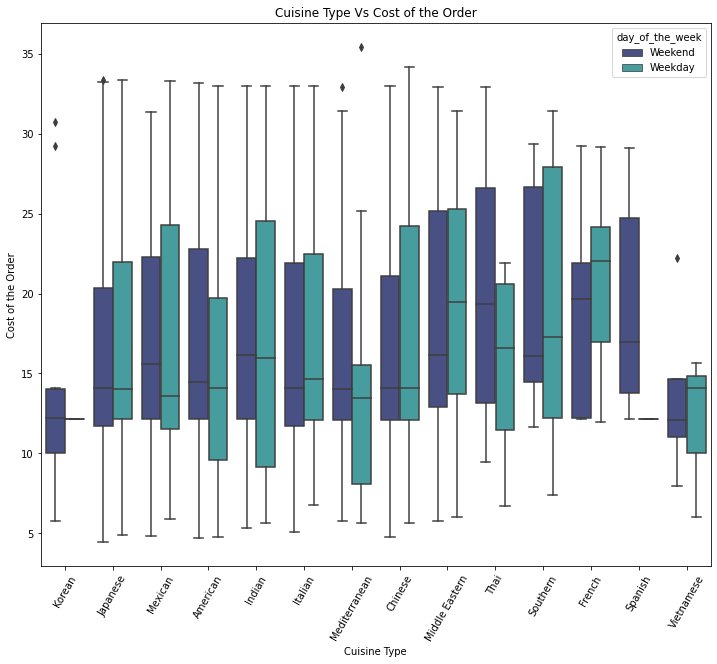

In [ ]:
plt.figure(figsize=(12,10)) 
bxplot=sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order',palette='mako',hue='day_of_the_week')
plt.title('Cuisine Type Vs Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=60)
plt.show()

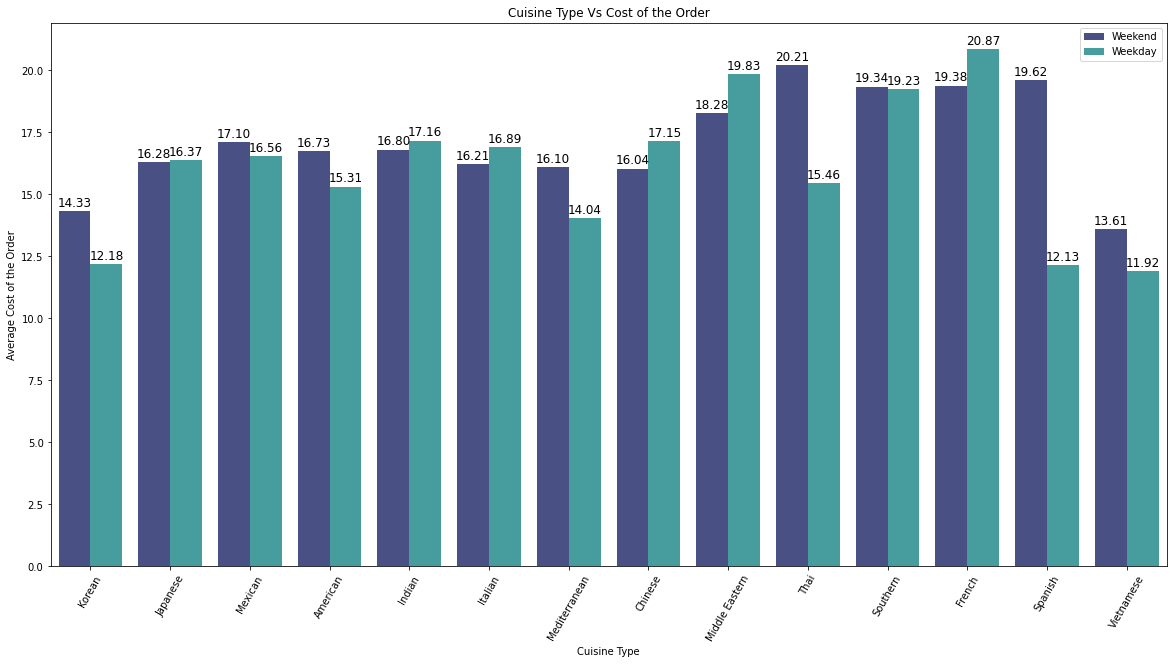

In [ ]:
plt.figure(figsize=(20,10)) 
bplot=sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order',palette='mako',hue='day_of_the_week',ci=None)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.legend(loc='best')
plt.xticks(rotation=60)
plt.title('Cuisine Type Vs Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of the Order')
plt.show()

In [ ]:
#Extracts top 5 cuisine Type
top5_cus_name = df['cuisine_type'].value_counts().reset_index().iloc[0:5,0]
top5_cus_name
# Creates a seperate dataframe of top 5 Cuisine Type
df_top5_cus_name = df[df['cuisine_type'].isin(top5_cus_name)]

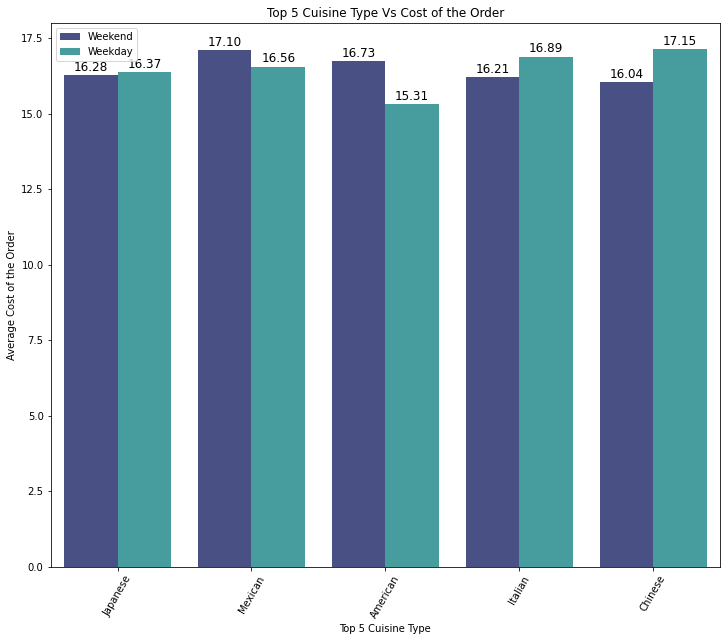

In [ ]:
plt.figure(figsize=(12,10)) 
bplot=sns.barplot(data=df_top5_cus_name, x='cuisine_type', y='cost_of_the_order',palette='mako',hue='day_of_the_week',ci=None)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.legend(loc='best')
plt.xticks(rotation=60)
plt.title('Top 5 Cuisine Type Vs Cost of the Order')
plt.xlabel('Top 5 Cuisine Type')
plt.ylabel('Average Cost of the Order')
plt.show()

**Observations:**

**Weekday:**

Average Highest cost of the order-French cuisine (20.9 USD)

Average Lowest cost of the order-Vietnamese cuisine - (11.9 USD)

Outliers for order cost - Mediterranean cuisine

**Weekend**

Average Highest cost of the order-Thai cuisine (20.2 USD)

Average Lowest cost of the order-Vietnamese cuisine - (13.6 USD)

Outliers for order cost -Vietnamese, Japanese, Mediterranean, and Korean

**Top Cuisine Types** have their average cost of order range from 15 USD to 17 USD

**Restaurant vs Cost of the Order** 

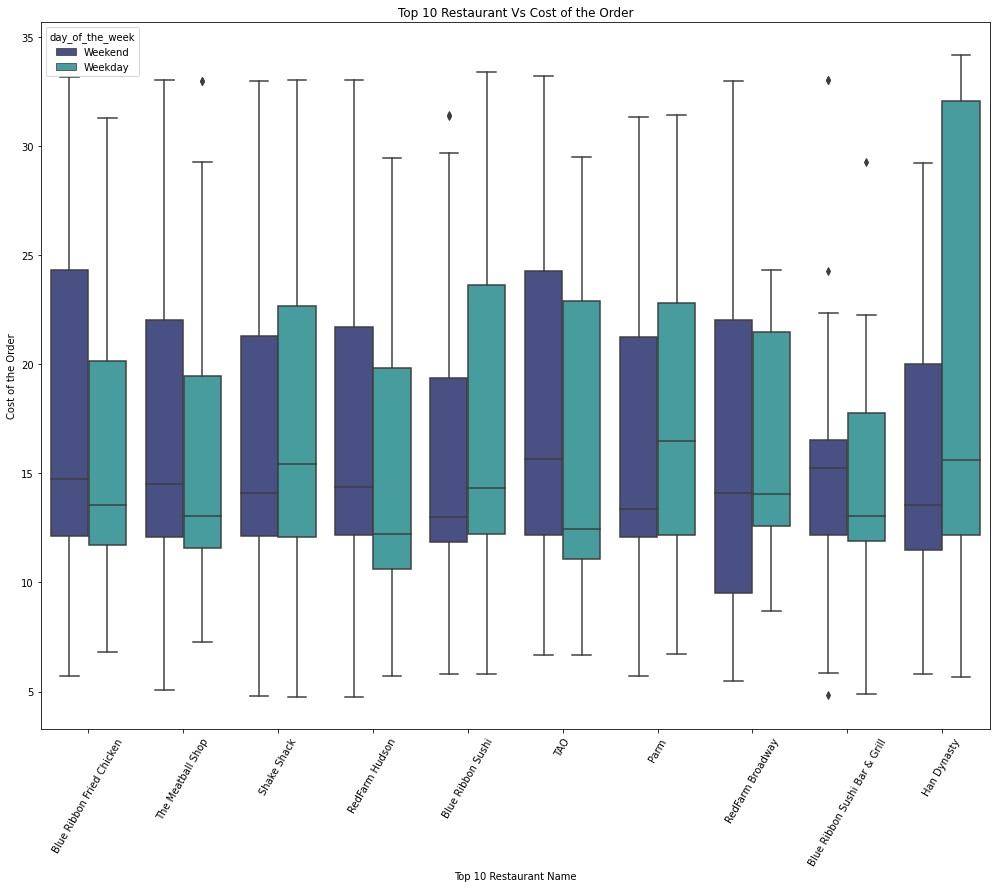

In [ ]:
plt.figure(figsize=(17,13)) 
bxplot=sns.boxplot(data=df_top10_rest_name, x='restaurant_name', y='cost_of_the_order',palette='mako',hue='day_of_the_week')
plt.title('Top 10 Restaurant Vs Cost of the Order')
plt.xticks(rotation=60)
plt.xlabel('Top 10 Restaurant Name')
plt.ylabel('Cost of the Order')
plt.show()

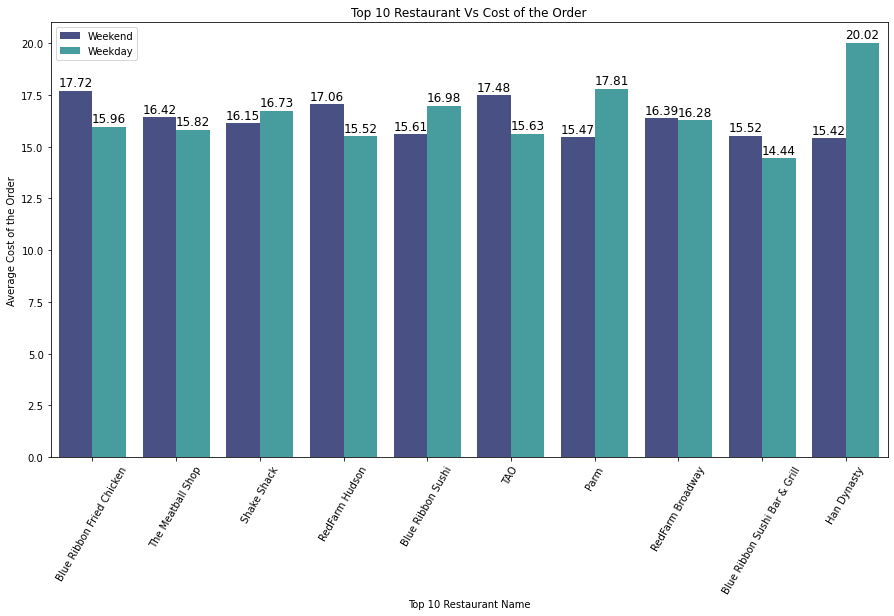

In [ ]:
plt.figure(figsize=(15,8)) 
bplot=sns.barplot(data=df_top10_rest_name, x='restaurant_name', y='cost_of_the_order',palette='mako',hue='day_of_the_week',ci=None)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.legend(loc='best')
plt.xticks(rotation=60)
plt.title('Top 10 Restaurant Vs Cost of the Order')
plt.xlabel('Top 10 Restaurant Name')
plt.ylabel('Average Cost of the Order')
plt.show()

**Observations:**

The Meatball Shop have outliers on Weekdays and Blue Ribbon Sushi have outliers on Weekends.

Blue Ribbon Sushi Bar &  Grill have outliers on both Weekdays and Weekends.

The top 4 restaurants receiving the highest order cost have their average cost of the order as 15 USD to 17 USD


In [ ]:
#Returns the order that has the highest cost of order
df[df['cost_of_the_order']== df['cost_of_the_order'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


In [ ]:
#Returns the order that has the lowest cost of order
df[df['cost_of_the_order']== df['cost_of_the_order'].min()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26


**Observations:**

Customer ID 52327 placed lowest cost of order from Nobu Next Door for Japanese Cuisine and Customer ID 62359 placed highest cost of order from Pylos for Meditteraen Cuisine Type.

Top 5 restaurants receiving highest order of cost has their average cost of order as 16 USD except Blue Ribbon Fried Chicken whose mean cost of order is 17 USD.



**Total  Restaurant Income and Total  Company Revenue**:

In [ ]:
df_total_rest_income=df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False)
df_total_rest_income

restaurant_name
Shake Shack                 3579.53
The Meatball Shop           2145.21
Blue Ribbon Sushi           1903.95
Blue Ribbon Fried Chicken   1662.29
Parm                        1112.76
                              ...  
Market Table                   6.79
Wa Jeal                        6.74
Cipriani Le Specialita         5.92
Big Wong Restaurant            5.92
Hunan Manor                    5.72
Name: cost_of_the_order, Length: 178, dtype: float64

In [ ]:
df_total_rest_income=df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=True)
df_total_rest_income

restaurant_name
Hunan Manor                    5.72
Cipriani Le Specialita         5.92
Big Wong Restaurant            5.92
Wa Jeal                        6.74
Market Table                   6.79
                              ...  
Parm                        1112.76
Blue Ribbon Fried Chicken   1662.29
Blue Ribbon Sushi           1903.95
The Meatball Shop           2145.21
Shake Shack                 3579.53
Name: cost_of_the_order, Length: 178, dtype: float64

**Observations:**

The restaurant with the highest income is Shake Shack with 3579.53 USD followed by, The Meatball Shop with 2145.21 USD, Blue Ribbon Sushi with 1903.95 USD, Blue Ribbon Fried Chicken with 1662.29 USD and Parm with 1112.76 USD.

The restaurant with lowest income is Hunan Manor with 5.72 USD followed by Big Wong Restaurant with 5.92 USD and Big Wong Restaurant also with 5.92 USD.

**Cuisine Type Vs Rating**

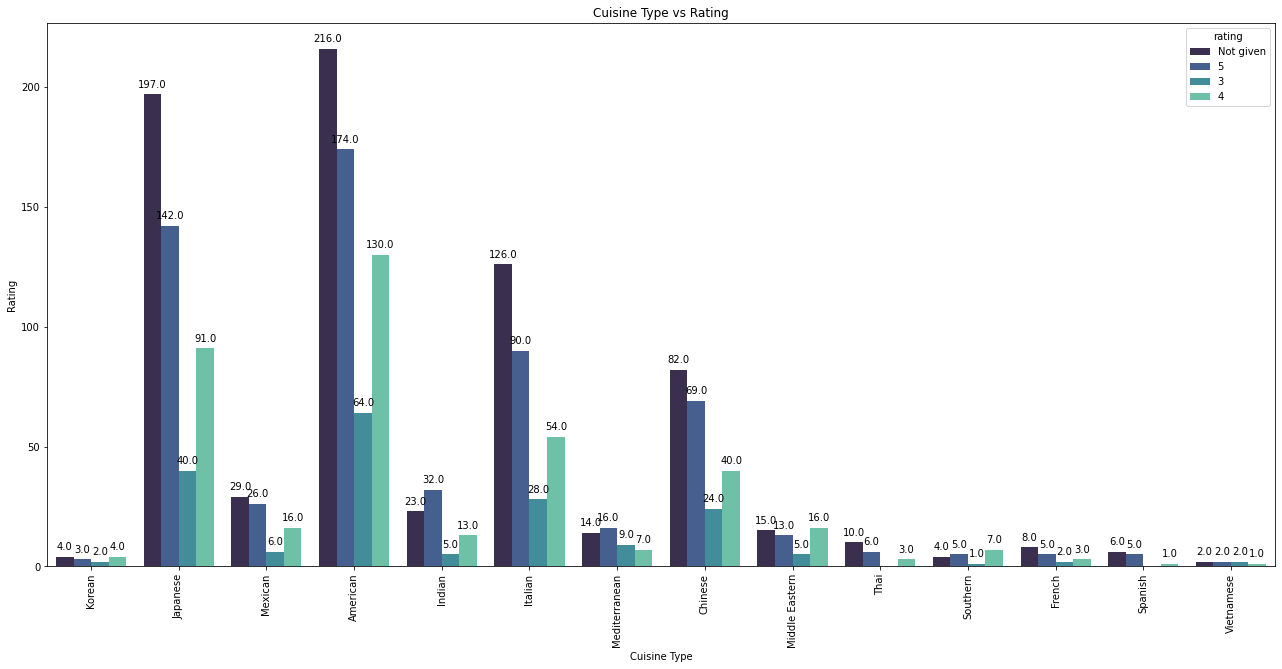

In [ ]:
plt.figure(figsize=(22,10)) 
splot=sns.countplot(data=df, x='cuisine_type', hue='rating',palette='mako')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90);
plt.title('Cuisine Type vs Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.show()

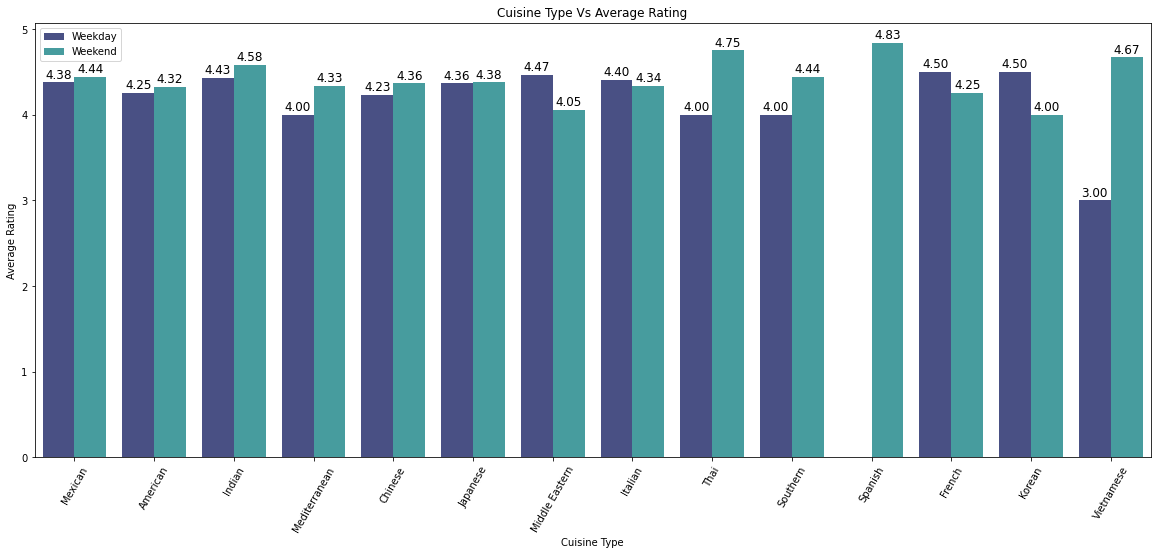

In [ ]:
plt.figure(figsize=(20,8)) 
bplot=sns.barplot(data=df_rated_data, x='cuisine_type', y='rating',palette='mako',hue='day_of_the_week',ci=None)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.legend(loc='best')
plt.xticks(rotation=60)
plt.title('Cuisine Type Vs Average Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.show()

**Observations:**

Cuisine Type American,Japanese, Chinese and Italian has the highest ratings.

Average Rating for any cuisine type is same on Weekdays and Weekends and hence day of the week has no impact on Ratings.

Spanish Cuisine is only type that has no rating on weekday.

**Restaurant Vs Rating**

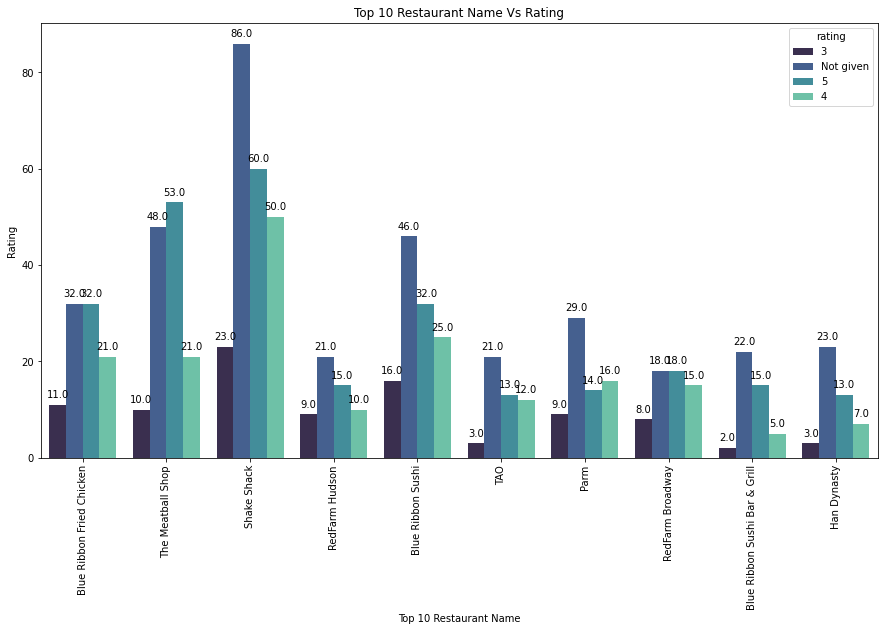

In [ ]:
plt.figure(figsize=(15,8)) 
splot=sns.countplot(data=df_top10_rest_name, x='restaurant_name', hue='rating',palette='mako')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90);
plt.title('Top 10 Restaurant Name Vs Rating')
plt.xlabel('Top 10 Restaurant Name')
plt.ylabel('Rating')
plt.show()

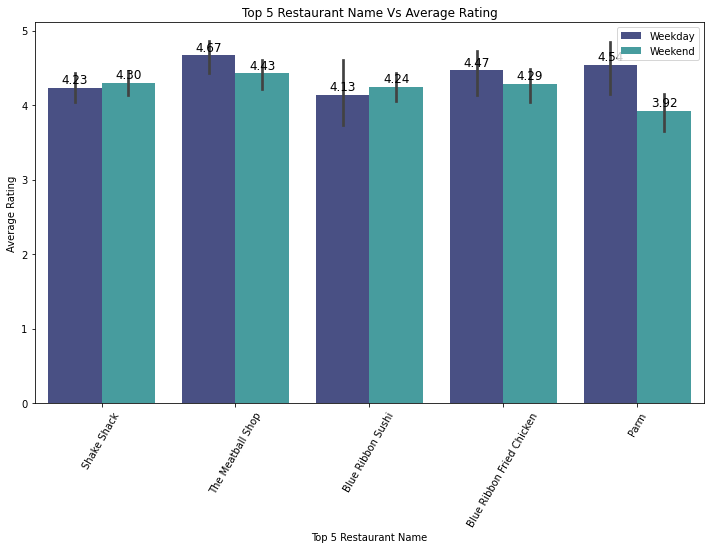

In [ ]:
plt.figure(figsize=(12,7)) 
bplot=sns.barplot(data=df_rated_data, x='restaurant_name', y='rating',order = df.restaurant_name.value_counts().iloc[:5].index,palette='mako',hue='day_of_the_week')
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.legend(loc='best')
plt.xticks(rotation=60)
plt.title('Top 5 Restaurant Name Vs Average Rating')
plt.xlabel('Top 5 Restaurant Name')
plt.ylabel('Average Rating')
plt.show()

**Observations:**

Cuisine Type American, Japanese, Chinese and Italian have the highest number of ratings.

The average rating for any cuisine type is the same on all days and hence day of the week has no impact on Ratings.

Spanish Cuisine is the only type that has no rating on a weekday.

**Cuisine Type Vs Food Preparation Time**

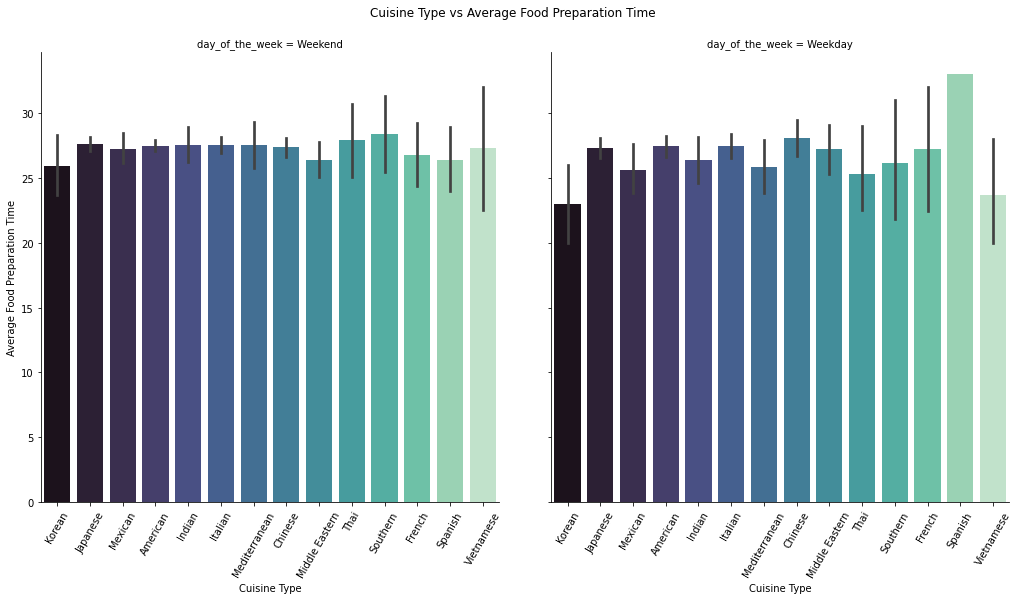

In [ ]:
cplot=sns.catplot(data = df,x = 'cuisine_type', y = "food_preparation_time",col='day_of_the_week',kind='bar',palette='mako')
cplot.fig.set_size_inches(15, 8)
cplot.fig.subplots_adjust(top=0.9)
cplot.set_xticklabels(rotation=60)
cplot.fig.suptitle('Cuisine Type vs Average Food Preparation Time')
cplot.set_xlabels('Cuisine Type')
cplot.set_ylabels('Average Food Preparation Time')
plt.show()

**Observations:**

Average Food preparation time shows no major difference between weekdaysand weekends  for any type of cuisine except for Spanish which shows slighly higher preparation time on weekday.


**Cuisine Type Vs Delivery Time**

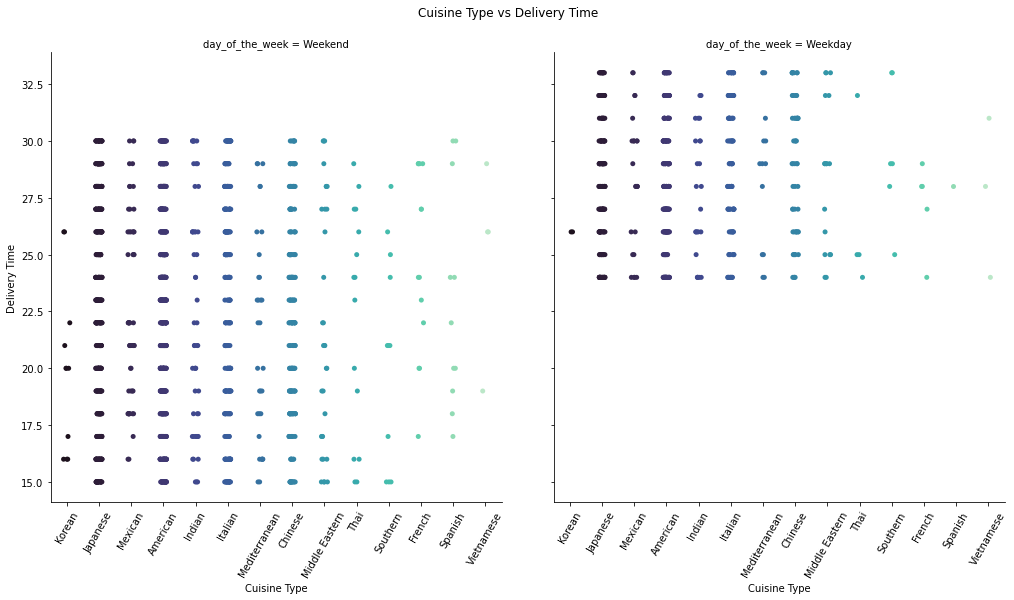

In [ ]:
cplot=sns.catplot(data = df,x = 'cuisine_type', y = "delivery_time",col='day_of_the_week',kind='strip',palette='mako')
cplot.fig.set_size_inches(15, 8)
cplot.fig.subplots_adjust(top=0.9)
cplot.set_xticklabels(rotation=60)
cplot.fig.suptitle('Cuisine Type vs Delivery Time')
cplot.set_xlabels('Cuisine Type')
cplot.set_ylabels('Delivery Time')
plt.show()

**Observations:**

The average delivery time on the weekday is higher than the average delivery time on the weekend for any cuisine type.

**Restaurant Vs Food Prepartion Time**

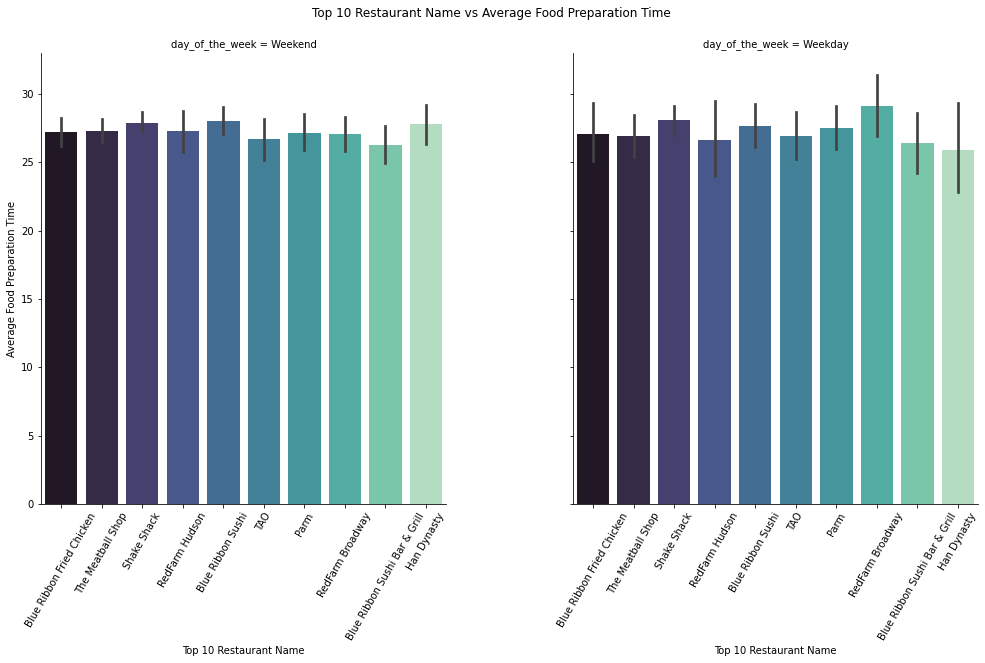

In [ ]:
cplot=sns.catplot(data = df_top10_rest_name,x = 'restaurant_name', y = "food_preparation_time",col='day_of_the_week',kind='bar',palette='mako')
cplot.fig.set_size_inches(15, 8)
cplot.fig.subplots_adjust(top=0.9)
cplot.set_xticklabels(rotation=60)
cplot.fig.suptitle('Top 10 Restaurant Name vs Average Food Preparation Time')
cplot.set_xlabels('Top 10 Restaurant Name')
cplot.set_ylabels('Average Food Preparation Time')
plt.show()

**Observations:**

Average Food preparation time remains stable on all days for Top 10 Restaurant.

**Restaurant Name Vs Delivery Time**

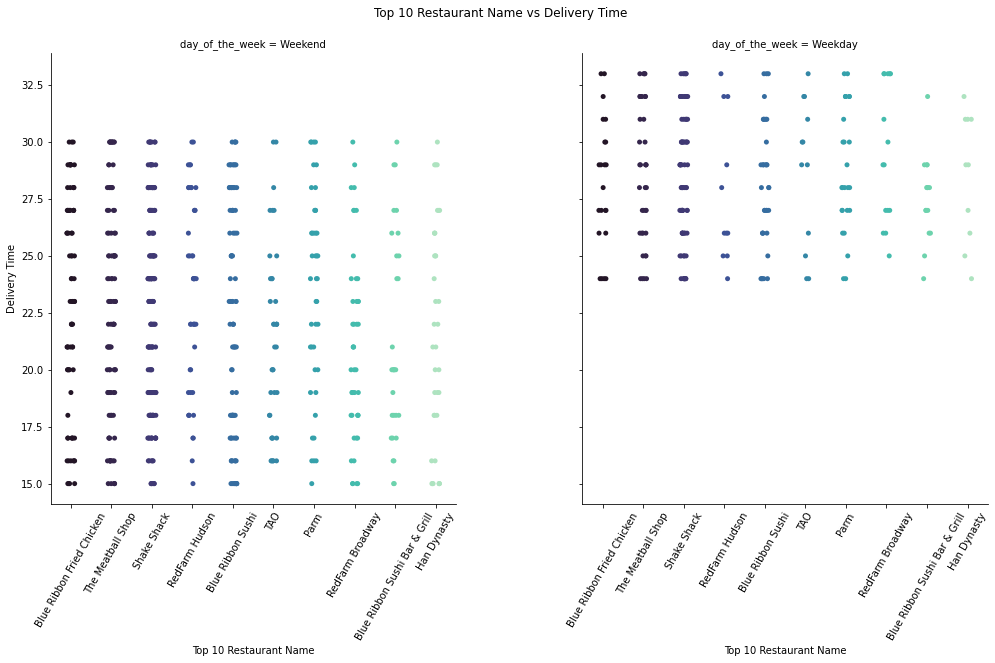

In [ ]:
cplot=sns.catplot(data = df_top10_rest_name,x = 'restaurant_name', y = "delivery_time",col='day_of_the_week',kind='strip',palette='mako')
cplot.fig.set_size_inches(15, 8)
cplot.fig.subplots_adjust(top=0.9)
cplot.set_xticklabels(rotation=60)
cplot.fig.suptitle('Top 10 Restaurant Name vs Delivery Time')
cplot.set_xlabels('Top 10 Restaurant Name')
cplot.set_ylabels('Delivery Time')
plt.show()

**Observations:**

Average delivery time of weekday is higher than the average delivery time of weekend for all Restaurants

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df_rating_count = df_rated_data.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names_selected=df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# # Filter to get the data of restaurants that have rating count more than 50
df_avg_rating=df_rated_data[df_rated_data['restaurant_name'].isin(rest_names_selected)]
# # Group the restaurant names with their ratings and find the mean rating of each restaurant
df_avg_rating.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False)


restaurant_name
The Meatball Shop           4.51
Blue Ribbon Fried Chicken   4.33
Shake Shack                 4.28
Blue Ribbon Sushi           4.22
Name: rating, dtype: float64

**Observations:**

Restaurants that are eligible for Promotional offer are as follows

The Meatball Shop          - 4.51

Blue Ribbon Fried Chicken   - 4.33

Shake Shack                 - 4.28

Blue Ribbon Sushi           - 4.22

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calc_revenue(cost):
    if cost > 20:
        return cost*0.25
    elif cost > 5:
        return cost*0.15
    else:
        return cost*0

df['Revenue'] = df['cost_of_the_order'].apply(calc_revenue)


In [ ]:
print('The net revenue generated by the company across all orders is ',df['Revenue'].sum(),'USD')

The net revenue generated by the company across all orders is  6166.303 USD


In [ ]:
df_total_rest_revenue=pd.DataFrame(df.groupby(['restaurant_name'])['Revenue'].sum().sort_values(ascending=False)).reset_index().head(20)
df_total_rest_revenue

,restaurant_name,Revenue
0,Shake Shack,703.61
1,The Meatball Shop,419.83
2,Blue Ribbon Sushi,360.46
3,Blue Ribbon Fried Chicken,340.20
4,Parm,218.56
5,RedFarm Broadway,191.47
6,RedFarm Hudson,180.93
7,TAO,167.36
8,Han Dynasty,149.40
9,Rubirosa,140.81


**Observations:**

The net revenue generated by the company across all orders is  6166.303 USD

Only 15 restaurants contributed more than 100 USD to the Company's revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time_taken']=df['food_preparation_time']+df['delivery_time']
perc_totaltime_60=(df[df['total_time_taken'] >60].shape[0]/df.shape[0])*100
print("Percentage of orders taking time greater than 60 minutes: ",round(perc_totaltime_60,2),'%',sep='')

Percentage of orders taking time greater than 60 minutes: 10.54%


<Figure size 720x720 with 0 Axes>

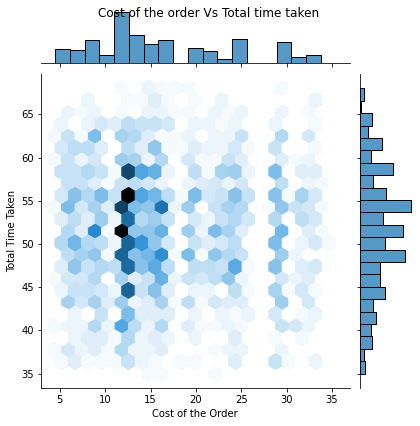

In [ ]:
plt.figure(figsize=(10,10)) 
cplot=sns.jointplot(data=df,x='cost_of_the_order',y='total_time_taken',kind='hex',palette='crest')
cplot.fig.suptitle('Cost of the order Vs Total time taken')
plt.xlabel('Cost of the Order')
plt.ylabel('Total Time Taken')
plt.show()

**Observations:**

Percentage of orders taking time greater than 60 minutes: 10.54%

Orders that are placed for the price range of 10- 15 USD are more likely to have a total time range from 50 - 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

**Observations:**

The delivery time on Weekdays is higher than the delivery time on Weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

**Observations:**

The food Service App is used only by a few frequent customers over the few popular Restaurants. 50% of the customers use the App to place 1-2 orders.

38% of the Orders are not Rated. 83% of orders that are rated have a rating value of 4 or 5.

Maximum number of Orders Placed by a Customer– 13

Top 4 Frequent Customer IDs - 52832, 47440, 83287 and 250494.

Top 5 Highest-Ordered Restaurant Contribution in receiving orders - 
Shake Shack 11.5%, The Meatball Shop 6.9%, Blue Ribbon Sushi 6.2%, Blue Ribbon Fried Chicken 5.06%, Parm 3.5%

Top 5 Highest-Ordered Cuisine Type Contribution in receiving orders-
American 30.7%, Japanese 24.7% , Italian 15.7%, Chinese 11.3% , Mexican 4.0%

**Cost of Order:**
Most of the orders placed and rated fall under the price range 10-15 USD.

Orders that are placed for the price range of 10- 15 USD are more likely to have a total time range from 50 - 60 minutes.

Top Cuisine Types have their average cost of order range from 15 USD to 17 USD.

The top 4 restaurants receiving the highest order cost have their average cost of the order as 15 USD to 17 USD.

**Food Preparation Time, Delivery Time, and Cost of the Order:**
The Food preparation time is stable and remains constant for any type of cuisine or restaurant on all days, but the delivery time is high for orders over the weekdays compared to weekends.

Food preparation time, Delivery Time, and Cost of Order have no linear relation with each other but however Delivery time remains high on weekdays for any number of order costs or for any duration of food preparation time.

Percentage of orders taking total time greater than 60 minutes: 10.54%. This value is influenced by increased delivery time on weekdays.

71% of orders are placed on weekends and 29% of orders are placed on weekdays. 
The Ratings remain constant for food preparation time and begin to increase around the average delivery time.

The average rating for any cuisine type is the same on all days and hence day of the week has no impact on Ratings.

**Restaurants:**
Most of the orders placed are placed over the same set of restaurants. Of 178 restaurants, The Shake Shack Restaurant received 11% of the total orders and have an Average rating of 4.28%.

The Meatball Shop is the second highest-ordered restaurant but has an average rating of 4.5% higher than Shake Shack.

The restaurants Blue Ribbon Sushi Bar & Grill and Han Dynasty have an average rating higher than Shake Shack and hold a reasonable count of orders other than the top 5 highest-ordered Restaurants.

**Cuisine Type:**
Orders are placed for 14 cuisine types. The American and Japanese alone contribute 54% and the remaining 46% are shared by 12 other cuisine types.

American cuisine is the most preferred and has an average rating of 4.3. 

Japanese and Italian are the next popular cuisine type but have an average rating higher than American.

Indian and Mexican are the cuisine type that has an average rating higher than American and with a reasonable count of orders placed other than the top 5 cuisines.

Spanish Cuisine is the only type that has no rating on a weekday and also shows a slightly higher preparation time on a weekday.

**Revenue:**
Restaurant with the highest revenue is Shake Shack with 3579.53 USD followed by The Meatball Shop with 2145.21 USD, Blue Ribbon Sushi with 1903.95 USD, Blue Ribbon Fried Chicken with 1662.29 USD, and Parm with 1112.76 USD.

The net revenue generated by the company across all orders is 6166.303 USD.

Only 14 Restaurants have their order cost greater than 100 USD.

**Outliers:** 
The difference in the 75th percentile and the maximum value for the cost of an order indicates outliers.

The Meatball Shop have outliers on Weekdays and Blue Ribbon Sushi have outliers on Weekends.

Blue Ribbon Sushi Bar & Grill have outliers on both Weekdays and Weekends.

Mediterranean cuisine has outliers over weekdays.

Cuisine types of Vietnamese, Japanese, Mediterranean and Korean have outliers  over the weekends.

**Recommendations:**

The food Service App is used only by a few frequent customers over the few popular Restaurants. Food Hub Company can advertise  and target its app to different audiences and encourage them to place orders using  the App.

38% of orders are not rated. The ratings must be further investigated to identify if the data was not provided or it may be due to unsatisfied customers failing to provide rating. Reminders can be sent to rate the orders.

Maximum number of Orders Placed by a Customer is 13. The Business can provide offers and promotions for the customer's first 5 orders to increase the number of orders placed by them. Coupon discounts or reward points must be awarded to Frequent customers to place more orders.

Businesses must further investigate the list of restaurants for which the service is provided. The app should extend services to new restaurants that can help increase the number of orders.

Food preparation time, Delivery Time, and Cost of Order do not influence each other however Delivery time remains high on weekdays for any number of order costs or Food preparation time. Delivery time must be examined further to ensure zero delays. The delivery persons can be rewarded each time when the food is delivered on time.

71% of orders are placed on weekends and 29% of orders are placed on weekdays. Weekday orders must be examined to understand what causes the drop in the number of orders. Additional exploration is required to understand if the increase in the delivery time on weekdays can be a possible reason for the decrease in orders.

The restaurants Blue Ribbon Sushi Bar & Grill and Han Dynasty have an average rating higher than Shake Shack which has the highest average rating but has moderate orders apart from the top 5 highest ordered Restaurants. These restaurants can be provided with special discounts and thereby encouraging people to place more orders.

Indian and Mexican are the cuisine type that has an average rating higher than most preferred cuisine type American but have reasonable orders placed apart from the top 5 cuisine popular restaurants. Restaurants with Indian and Mexican Cuisine types must be included and the App should be promoted to the appropriate audiences who prefer these cuisine types.

Outliers require further investigation to understand their influence over the cost of the order.

The high number of high-cost orders will increase overall revenue. 

Only 15 Restaurants out of 178 contributed more than 100 USD to the Company’s Revenue. The above recommendations might help in the overall increase in orders for rest of the restuarants with low contribution.

---